In [1]:
import matplotlib.pyplot as plt
import torch
torch.manual_seed(42)
import torchvision

In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import unet

In [3]:
root = "/cluster/tufts/hugheslab/eharve06/CIFAR-10"
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
train_dataset = torchvision.datasets.CIFAR10(root=root, train=True, transform=transform, download=True)
image = train_dataset[0][0]
print(image.shape)

Files already downloaded and verified
torch.Size([3, 32, 32])


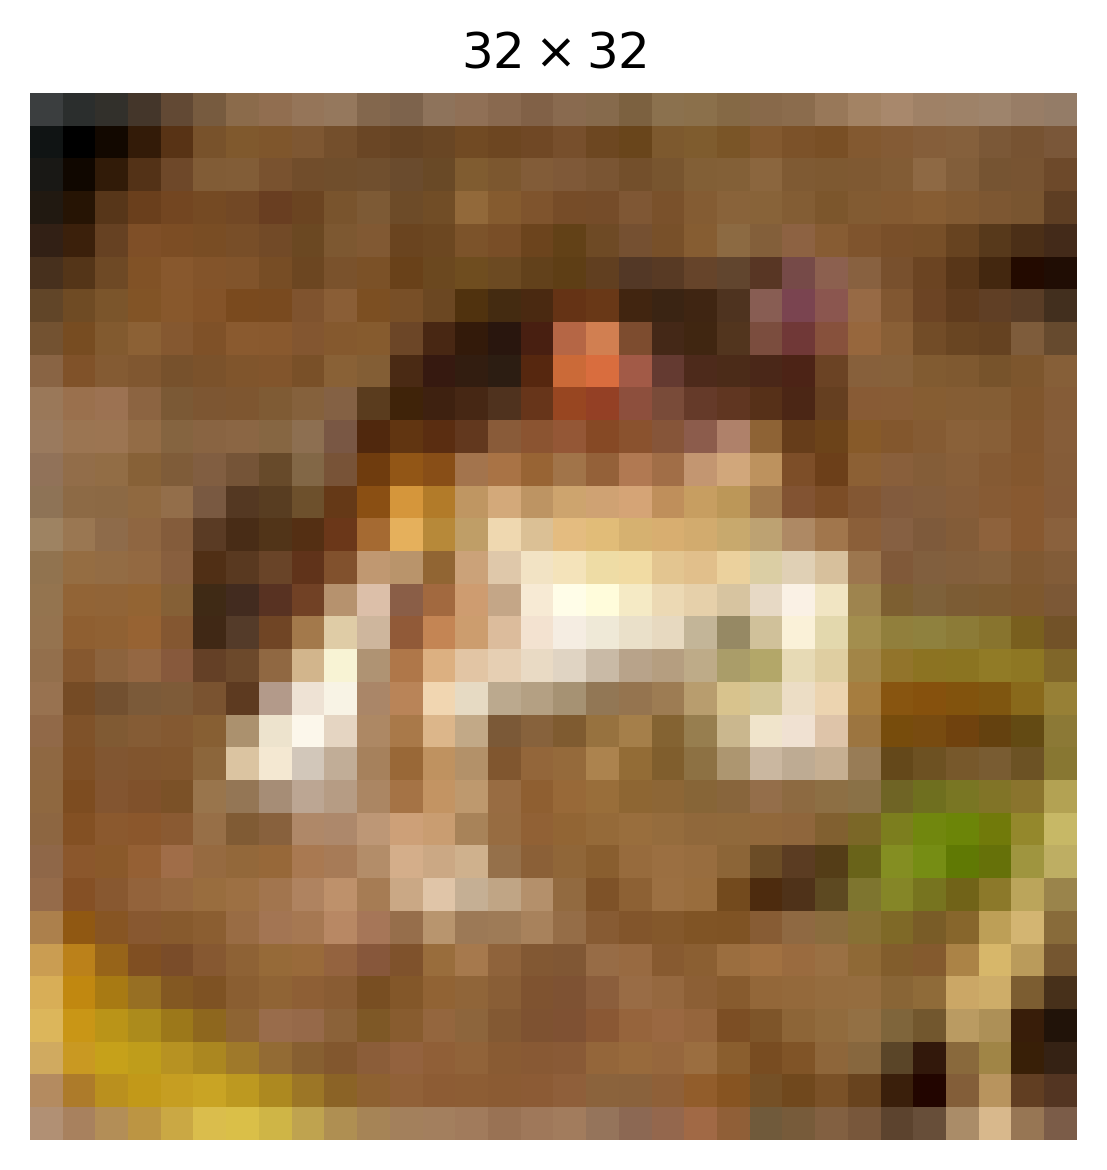

In [4]:
ncols, nrows = 1, 1
fig, ax = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

ax.imshow(image.permute(1, 2, 0))
ax.set_title(rf"${image.shape[1]}\times{image.shape[2]}$")
ax.axis("off")

fig.tight_layout()
plt.show()

In [5]:
x_t = image[None,:,:,:]
t = torch.tensor([1,])

model = unet.UNet()

with torch.no_grad():
    up_x_t = torch.nn.functional.interpolate(x_t, scale_factor=2, mode="nearest")
    logits = model(up_x_t, t)
    print(logits.shape)
    

torch.Size([1, 3, 64, 64])


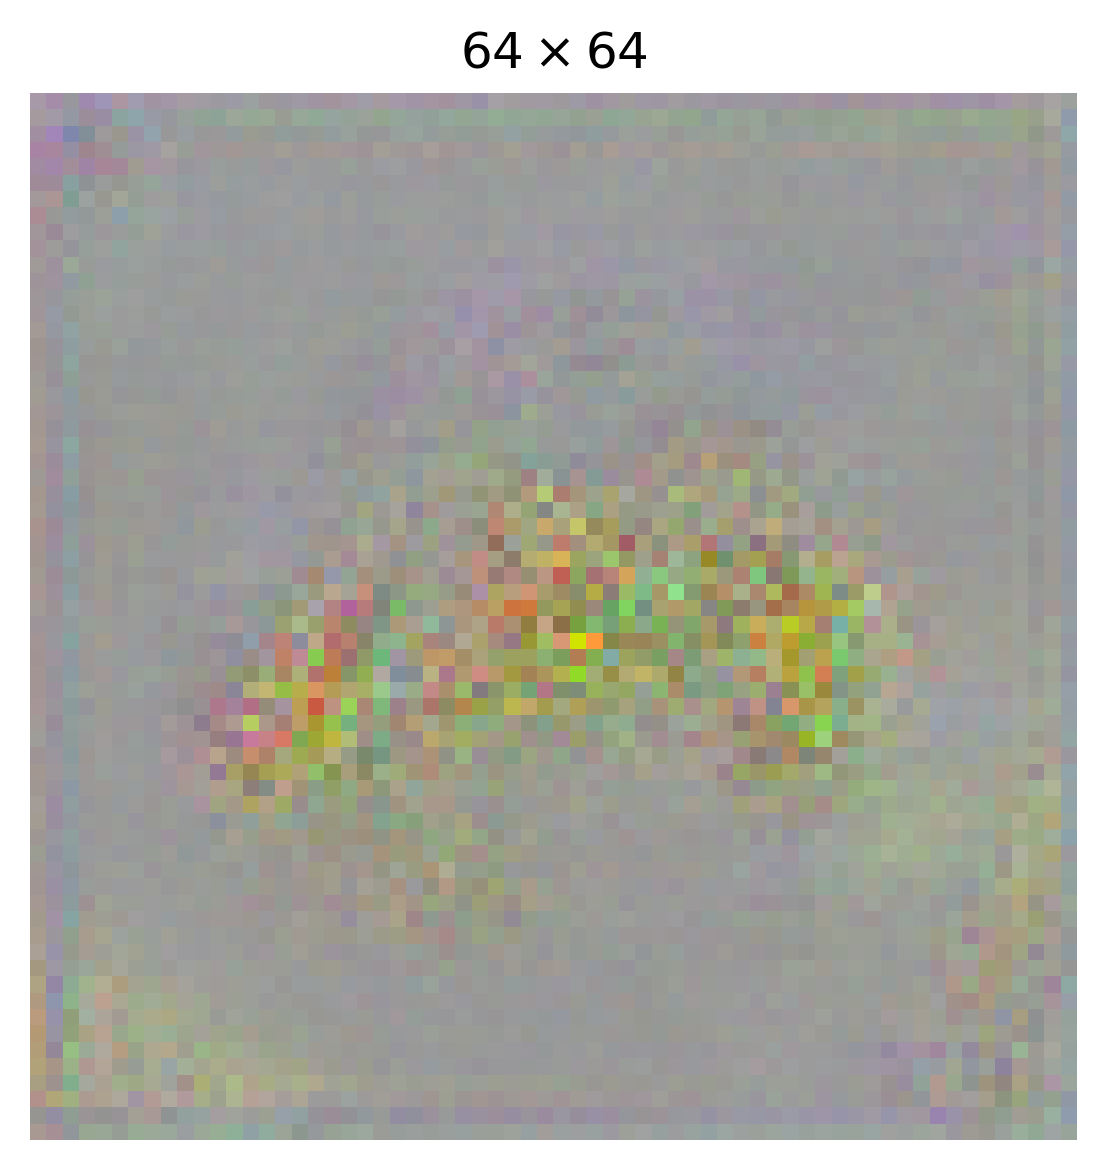

In [6]:
with torch.no_grad():
    norm_logits = (logits - logits.min()) / (logits.max() - logits.min())

ncols, nrows = 1, 1
fig, ax = plt.subplots(dpi=300, figsize=(4*ncols, 4*nrows), ncols=ncols, nrows=nrows)

ax.imshow(norm_logits[0].permute(1, 2, 0))
ax.set_title(rf"${norm_logits[0].shape[1]}\times{norm_logits[0].shape[2]}$")
ax.axis("off")

fig.tight_layout()
plt.show()